# 1	Introduction
The MULTIPLY framework is a new toolkit to extract information from remote sensing data. In contrast to other remote sensing software packages, MULTIPLY is designed to consistently use heterogeneous satellite data (coarse vs high, optical vs microwave). Instead of multiple independent process-chains for each individual satellite, MULTIPLY is a single all-in-coupling framework in order to:
*	Create consistencies between different land surface products (reducing errors in downstream-processing)
*	Utilize the benefits of multiple satellites (including Sentinel-1, Sentinel-2, MODIS, Landsat), such as 
    * Higher temporal coverage
    * Spectral Sensitivity to more land surface variables
*	Quantify errors of output products, depending on input uncertainties.
*	Enable operational service for different end-users, including: 
    * Remote sensing consultants
    *	Remote sensing experts
In order to achieve these goals MULTIPLY uses a data-assimilation framework developed for the ESA (Gómez-Dans et al. 2016; Lewis et al. 2012). In this framework the state-vector (describing the land surface parameters of interest) are coupled to the observations using radiative transfer models. In addition priori-information (obtained from field-measurements databases) are used to constrain the final results. 


# 2	MULTIPLY Concepts
## 2.1	Radiative transfer models
In it’s most basic description, a radiative transfer model is a model  capable of (using a specific state-vector) as an input simulateing the different interactions of radiation (light) from source (sun/clouds/..) to sensor (satellite ), using a specific state-vector as an input.  Within the model the most important absorption/transmission and reflection processes by different objects (soil/leaf/atmosphere) is characterized. In this regard there exist many radiative transfer models exist, depending on the level and detail of which important processes are taken into account. In practice, highly complex radiative radiative transfer models usually have a high number of input parameters (to describe in detail the 3D structure of the land surface and the full land surface heterogeneity), while less complex models employ specific hypotheses (such as land surface homogeneity) to require less input parameters. 

<img src="pics/BasicDescriptionRTM2.png">
Figure 1: Basic description of Radiative Transfer model

While this produces a large variety in radiative transfer models, all of these models have at least one common aspect: they can only be run in ‘forward mode’. This is because completely different scenarios can produce similar remote sensing observations. For example, when a land surface has a very low fractional vegetation cover (~0), different chlorophyll levels will produce similar remote sensing observations.

## 2.2	Data assimilation
The most common way to circumvent the shortcoming of radiative transfer models is to ‘guess’ the initial state-vector, run the radiative transfer model using this initial assumption, and compare the output observation against the remote sensing measurement, producing an error. By guessing multiple times,  (for instance by constructing a Look-up-Table (LUT), multiple error-values can be calculated. The lowest error-value than represents our best understanding of the land surface (as long as our initial assumption was close enough to the real land surface description). 

<img src="pics/CreatingLUTs.png">
Figure 2: Creating LUT tables

Such an LUT approach has the large disadvantage that it only finds values that were used in the initial guessing; for example if for the Leaf Area Index (LAI) only values [0, 1, 2,.. ,6] were used, this retrieval method will not find the (actual) value of 1.22 m2/m2. 
The shortcoming of the LUT approach can be greatly to a large part be circumvented if the initial scenarios can be updated on basis of the errors found,  (together with taking into account the sensitivity of the model to the state vector), as illustrated by in Figure 3. Such an iterative approach is in general ‘optimization’ of the radiative transfer model. 
 
<img src="pics/BasicOptimization.png">
Figure 3: Basic description of Optimization methodology

In this approach, it is possible for the state-vector to ‘slowly’ drift away from our prior-value. In addition, the approach is limited to produce only results for when satellite measurements are being performed. In order to solve these shortcomings additional (prior) information can be used within a data-assimilation framework. This is illustrated by Figure 4.

<img src="pics/DataAssimilation.png">
Figure 4: Data Assimilation of Radiative Transfer Models

## 2.3	Prior Information
In such an data-assimilation approach, an additional error (Error value 2) different from the observational error (Error 1) is defined, describing the deviation of the state-vector from our initial assumption. Here the observational error is defined in units of the observation (e.q. reflectances [-] or radiances [W sr^(-1) m^(-2) nm^(-1)]), while the prior-error is defined in units of the state vector (LAI  [m^2  m^(-2)], Leaf Angle Distribition [deg], …). In order to reconcile these two into one cost function the errors are normalized. For the observational error this is performed by considering the observational errors, while for the prior information this is accomplished by considering the prior uncertainty (for example the standard deviation of long-term measurements of the respective land surface parameter). This leads then to one single cost-function defined as:

J_tot=(Error_1)/σ_1 +  (Error_2)/σ_2 =J_obs+J_prior

This also immediately provides us with a method on synergistically combining different types of observations, as the observational error can simply be expanded to include multiple observations

J_obs=J_obs^1+ J_obs^2+ J_obs^3+⋯

In short, each of the error-terms corresponds to different pieces of information added to the system. In this case, even more additional information can also be introduced to the system, be considering the temporal evolution and spatial variation of specific land surface parameters. 


# 3	The prototype version overview 
We hereby provide you with a working prototype  version. This prototype  version is a stripped down version of the actual framework focusing primarily on the optical retrieval using both coarse (MODIS) and high resolution (Sentinel-2) observations. An overview of the full framework is provided in Figure 6. Here the specific modules that were not mature to be incorporated in this release, are the SAR preprocessing, SAR integration, Post processing (for biodiversity and fire disturbance monitoring), as well as the visualization component (highlighted by red circles )

<img src="pics/MultiplyModules.png">
Figure 5: Overview of MULTIPLY framework. Modules highlighted by a red circle are not included in the prototype version

In the version you will be able to download al the required earth observation data (using the data-access component), and afterwards retrieve land surface parameters (using the Inference Engine Module) at  20m resolution using a combination of MODIS coarse resolution data (from the Coarse res Preprocessing module) together with high resolution Sentinel-2 observations (from the high res preprocessing module), together with prior information on the land surface (by the Prior Engine module). In the future it is foreseen that multiple Radiative transfer models can be used, specific to the user requirements, however at the moment the only one available (in the forward operator module) is the emulated version of the PROSAIL radiative transfer mode . This limits the retrieval of land surface parameters to a) leaf-traits (Chlorophyll, Carotonoids, Dry matter, Water Content),  b) Vegetation structural parameters (hotspot parameter, LAI, leaf structure), and c some auxiliary soil parameters (Bsoil/Psoil).

<img src="pics/MultiplyOutput.png">
Figure 6: Overview of state-vector parameters retrievable on basis of the underlying forward operator (radiative transfer model

# 4 Usage
All the code for the individual modules are is located at https://github.com/multiply-org/. This can be used to setup the MULTIPLY framework on your own computing infrastructure. At present however no deployment setup (in the form of windows-setup-executables, or anaconda package’s) exist. While this is planned further intolater in the project, the focus at this stage is on testing the individual components themselves. Please let us know if you would prefer to install the software yourself on a dedicated computational framework, so that we can investigate how to facilitate this for you. 
In order to facilitate the testing of the framework itself, we have setup this Virtual Machine on Google Compute Engine, for testing purposes. 


## 4.0 Load internal packages and auxiliary methods

In [3]:
from multiply_data_access import DataAccessComponent
import datetime
import glob

## 4.1 Defining the interfaces to work with the MULTIPLY framework
First we need to setup interfaces to work and test with the MULTIPLY framework. In actual operation, these auxiliary interfaces are bundled together within a single python class. However as we would like you to test the different modules individually, we provide direct access to these. For more information on how these interfaces are defined, please check the following link: [MULTIPLY Tools](Tools.py). 


In [4]:
from vm_support.tools import get_static_data, get_dynamic_data

INFO:root:The config file can be found at /software/prior-engine/multiply_prior_engine/prior_engine_logging.yml


INFO     prior_logger __init__:  69: ------------- Logger initialized. -------------
INFO     prior_logger __init__:  70: The log file can be found at /tmp/MULTIPLYPriorEngine/prior_engine.log
INFO     __init__ <module>:  30: The temporary directory is set to /tmp/MULTIPLYPriorEngine


In [48]:
from vm_support.tools import preprocess_s2

In [49]:
from vm_support.tools import get_priors, get_priors_from_config_file

In [7]:
from vm_support.tools import infer, infer_new

In [8]:
from vm_support.tools import create_dir, put_data, InvTransformation

In [9]:
from vm_support.tools import Plot_SRDS,Plot_PRIORS, Plot_TRAITS,Plot_TRAIT_evolution, Plot_Transformation

# 5 Running MULTIPLY
Below the actual code is provided for running the MULTIPLY framework.
We start with setting earth data authentication. This is required to download the MODIS brdf descriptors which are required for the atmospheric correction of the Sentinel-2 data. You can get credentials when you register at https://urs.earthdata.nasa.gov/profile . Registration and use is free of cost. If you do not register, you can only use the MODIS data which has been downloaded in previous runs of the notebook by other users.
Also you will need to set up the data stores so that the data access component is working correctly and finds the pre-configured data stores. Both steps only need to be performed once.

In [10]:
# from vm_support import set_earth_data_authentication, set_mundi_authentication
# username = '' 
# password = ''
# set_earth_data_authentication(username, password) # to download modis data, needs only be done once
# access_key_id = ''
# secret_access_key = ''
# set_mundi_authentication()

## 5.1 Parameters
Here you can actually set the parameters for the run. The parameters are as follows:
* **roi**: A region of interest, given as a Polygon in WKT format. You can use this tool ( https://arthur-e.github.io/Wicket/sandbox-gmaps3.html ) to easily get definitions of the regions you are interested in in WGS84 coordinates.
* **roi_grid**: The EPSG-code of the spatial reference system in which the roi is given. If it is set to 'none', it is assumed that the roi is given in WGS84 coordinates.
* **destination_grid**: The EPSG-code of the spatial reference system in which the output shall be given. If it is set to 'none', the platform will attempt to derive it from the roi_grid.
* **spatial_resolution**: The resolution the output data is supposed to have, must be a non-negative integer number. The resolution is given in meters and is the same for both dimensions.
* **start_time**: The start date of the period you are interested in, must be given in the format 'Year-Month-Day' as below.
* **end_time**: The end date of the period you are interested in, must be given in the format 'Year-Month-Day' as below.
* **time_step**: The temporal resolution the output is supposed to have. Data will be aggregated over the period denoted by this parameter. Must be a non-negative integer value. The unit is days.
* **variables**: The list of the biophysical variables that shall be derived. Please do not change this list, as the underlying forward model requires all of them. The parameters are as follows:
  * **n**: Structural parameter
  * **cab**: Leaf Chlorophyll Content, given in ug/cm²
  * **car**: Leaf Carotonoid Content, given in ug/cm²
  * **cb**: Leaf senescent material
  * **cw**: Leaf Water Content, given in cm
  * **cdm**: Leaf Dry Mass, given in g/cm²
  * **lai**: Effective Leaf Area Index, given in m²/m²
  * **ala**: Average Leaf Angle, given in degrees
  * **bsoil**: Soil Brightness Parameter
  * **psoil**: Soil Wetness Parameter
* **file_mask**: A file that can be used to explicitly state the region you are interested in. You can also use it to mask out single pixels within this region. If this is not 'none', the aforementioned parameters roi_grid, spatial_resolution, and destination_grid are not used.

**HINT**: The platform will perform faster the smaller your roi and the larger the spatial resolution is.

### 5.1.1 Define region of Interest

In [11]:
roi_grid = 'EPSG:4326'
roi_centroid = [27.3, 58.3]
# roi = 'POLYGON((27.1615456795 58.2252523466, ' + \
#                 '27.1720041127 58.3418423196, ' + \
#                 '27.3885799673 58.3362682904, ' + \
#                 '27.3774098023 58.2196966529, ' + \
#                 '27.1615456795 58.2252523466))'
#roi = 'POLYGON((27.1615456795 58.2252523466, 27.1720041127 58.3418423196, 27.3885799673 58.3362682904, 27.3774098023 58.2196966529, 27.1615456795 58.2252523466))'
roi = 'POLYGON((27.2725456795 58.2252523466, 27.2720041127 58.3418423196, 27.3885799673 58.3362682904, ' + \
    '27.3774098023 58.2196966529, 27.2725456795 58.2252523466))'

destination_grid = 'EPSG:3301'                
spatial_resolution = 20 # in m

In [12]:
from IPython.display import IFrame

google_maps_url = "http://maps.google.com/maps?q=48.184543+11.213&ie=UTF8&t=h&z=18&output=embed&z=17"
google_maps_url = 'http://maps.google.com/maps?q=%7.5f' % roi_centroid[1] + '+%7.5f' % roi_centroid[0] +'&ie=UTF8&t=h&z=18&output=embed&z=10'
IFrame(google_maps_url,800,600)




### 5.1.2 Define temporal frequency and period

In [13]:
# start_time_as_string = '2018-05-8'
# stop_time_as_string = '2018-05-9'

# start_time_as_string = '2018-07-24'
# stop_time_as_string = '2018-07-25'

start_time_as_string = '2018-05-10'
stop_time_as_string = '2018-05-15'

time_step = 1 # in days

start_time_as_datetime = datetime.datetime.strptime(start_time_as_string, '%Y-%m-%d')
stop_time_as_datetime = datetime.datetime.strptime(stop_time_as_string, '%Y-%m-%d')

time_step_as_time_delta = datetime.timedelta(days=time_step)
variables = {'n', 'cab', 'car', 'cb', 'cw', 'cdm', 'lai', 'ala', 'bsoil', 'psoil'}

# file_mask = "mask.tif"
file_mask = None

### 5.1.3 Setting up the working directory
For this notebook, you will operate in your own working directory. All data you use will be copied here, all output will be written here.

In [14]:
from vm_support import get_working_dir
name = 'm1'
# use previous (non-empty) working directory
# working_dir = '/Data/test_user_##/' + name

#clear working directory
working_dir = get_working_dir(name)



In [15]:
print('Working directory is {}'.format(working_dir))

priors_directory = '{}/priors'.format(working_dir)
hres_state_dir = '{}/hresstate'.format(working_dir)
modis_directory = '{}/modis'.format(working_dir)
state_directory = '{}/state'.format(working_dir)
cams_directory = '{}/cams'.format(working_dir)
s2_l1c_directory = '{}/s2'.format(working_dir)
sdrs_directory = '{}/sdrs'.format(working_dir)
biophys_output = '{}/biophys'.format(working_dir)
emulators_directory = '{}/emulators'.format(working_dir)
dem_directory = '{}/dem'.format(working_dir)

Working directory is /data/working_dirs/m1


## 5.2 Acquire Static Data
We differentiate between two types of data here: Dynamic and static, meaning: Data which are valid for a certain period of time and data which is valid permanently. The latter is the elevation data of the Digital Elevation Model and the Emulators required for the Atmospheric Correction. We put them in their designated folders before we start our loop through time.

In [16]:
data_access_component = DataAccessComponent()
get_static_data(data_access_component=data_access_component, roi=roi,
                start_time=start_time_as_string, stop_time=stop_time_as_string, 
          emulation_directory=emulators_directory, dem_directory=dem_directory, roi_grid=roi_grid)

INFO     data_access_component _read_data_stores: 325: Read data store cams
INFO     data_access_component _read_data_stores: 325: Read data store cams_tiff
INFO     data_access_component _read_data_stores: 325: Read data store emulators
INFO     data_access_component _read_data_stores: 325: Read data store wv_emulator
INFO     data_access_component _read_data_stores: 325: Read data store aster_dem
INFO     data_access_component _read_data_stores: 325: Read data store modis_mcd43a1
INFO     data_access_component _read_data_stores: 325: Read data store S2L2
INFO     data_access_component _read_data_stores: 325: Read data store Mundi
Retrieving emulators ...
DEBUG    connectionpool _new_conn: 208: Starting new HTTP connection (1): www2.geog.ucl.ac.uk
DEBUG    connectionpool _make_request: 396: http://www2.geog.ucl.ac.uk:80 "GET /~ucfafyi/emus/ HTTP/1.1" 200 7702


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0


INFO:ComponentProgress:8
INFO:ComponentProgress:8
INFO:ComponentProgress:8
INFO:ComponentProgress:8
INFO:ComponentProgress:8


INFO     data_access_component get_data_urls: 228: 8


INFO:ComponentProgress:16
INFO:ComponentProgress:16
INFO:ComponentProgress:16
INFO:ComponentProgress:16
INFO:ComponentProgress:16


INFO     data_access_component get_data_urls: 228: 16


INFO:ComponentProgress:25
INFO:ComponentProgress:25
INFO:ComponentProgress:25
INFO:ComponentProgress:25
INFO:ComponentProgress:25


INFO     data_access_component get_data_urls: 228: 25


INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33


INFO     data_access_component get_data_urls: 228: 33


INFO:ComponentProgress:41
INFO:ComponentProgress:41
INFO:ComponentProgress:41
INFO:ComponentProgress:41
INFO:ComponentProgress:41


INFO     data_access_component get_data_urls: 228: 41


INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50


INFO     data_access_component get_data_urls: 228: 50


INFO:ComponentProgress:58
INFO:ComponentProgress:58
INFO:ComponentProgress:58
INFO:ComponentProgress:58
INFO:ComponentProgress:58


INFO     data_access_component get_data_urls: 228: 58


INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66


INFO     data_access_component get_data_urls: 228: 66


INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75


INFO     data_access_component get_data_urls: 228: 75


INFO:ComponentProgress:83
INFO:ComponentProgress:83
INFO:ComponentProgress:83
INFO:ComponentProgress:83
INFO:ComponentProgress:83


INFO     data_access_component get_data_urls: 228: 83


INFO:ComponentProgress:91
INFO:ComponentProgress:91
INFO:ComponentProgress:91
INFO:ComponentProgress:91
INFO:ComponentProgress:91


INFO     data_access_component get_data_urls: 228: 91


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


Retrieving DEM ...
INFO     data_access_component get_data_urls: 228: 0
Done retrieving static data


# 6. Infer variables
Now we can actually infer the bio-physical variables. For this, we will step though the time grid that we have set up using the start_time, end_time and time_step parameters above.
For this stepping, we create a *cursor* that points to the beginning of the time period that we are currently deriving data for.
We also define two variables *previous_inference_state* and *updated_inference_state* which will save the state of the inference engine and will ensure that the inference engine can consider the results from its last run.
The variable *preprocess_only_region_of_interest* allows to preprocess only the portion of the S2 image that we will consider during the inference. If we process the whole image though, we can save it and use it in later runs.

Thes stepping of time works as follows: Dedicated directories are set up for the MODIS, CAMS, and S2 data. These data are retrieved and put into these directories. After that, pre-processing will take place either on the whole S2 image or on the region of interest. If it has been performed on the whole region, the result will be permanently saved. Next, priors will be derived for every variable and every day within the current period. Having gathered all these, the inference can finally begin. The state of the inference engine is saved and considered during the next iteration.

## 6.1 Single Run Test
First for explanation, we will perform the inference over a single timestep. During this, we will show all the results to indicate the flow of the processings. 

### 6.1.1 setting up

In [18]:
cursor = start_time_as_datetime
previous_inference_state = None #'none'
updated_inference_state = 'none'
one_day_step = datetime.timedelta(days=1)
preprocess_only_region_of_interest = True

date_as_string = datetime.datetime.strftime(cursor, '%Y-%m-%d')
print('Doing time step starting on {}'.format(date_as_string))

Doing time step starting on 2018-05-10


In [ ]:
cursor += time_step_as_time_delta
cursor -= one_day_step
if cursor > stop_time_as_datetime:
    cursor = stop_time_as_datetime
next_date_as_string = datetime.datetime.strftime(cursor, '%Y-%m-%d')
cursor += one_day_step
cursor_as_string = datetime.datetime.strftime(cursor, '%Y-%m-%d')

modis_directory_for_date = '{}/{}'.format(modis_directory, date_as_string)
cams_directory_for_date = '{}/{}'.format(cams_directory, date_as_string)
s2_l1c_directory_for_date = '{}/{}'.format(s2_l1c_directory, date_as_string)
sdrs_directory_for_date = '{}/{}'.format(sdrs_directory, date_as_string)
priors_directory_for_date = '{}/{}/'.format(priors_directory, date_as_string)
date_as_string

### 6.1.2 Preprocessing

In [ ]:
get_dynamic_data(data_access_component, roi, roi_grid, date_as_string, next_date_as_string,
                 modis_directory_for_date, cams_directory_for_date, s2_l1c_directory_for_date)
preprocess_s2(s2_l1c_directory_for_date, modis_directory_for_date, emulators_directory, cams_directory_for_date, 
           dem_directory, sdrs_directory_for_date, roi)

In [ ]:
# visualize the atmospheric correction
prodnr = 0
Plot_SRDS(sdrs_directory)

In [ ]:
Productnr = 1
Plot_SRDS(sdrs_directory, Productnr)


### 6.1.3  Get Priors
You can choose to have the system create it's own 'default' configuration file (using the parameter values, specified earlier). Alternatively, one can make user-specific requests. For example, One can alter the Priors that are going to be used in the inference. If you would like to use these more complex metod, in the actual inference you should provide a link to this user configuration file (or uncomment this line, if one prefers the default configuration). 

Please be aware that new files have to be created in case of user-defined priors, which can take some time (depending on number of 'user-defined' priors, the size of the area and the duration of the time-period). 

In [20]:
# Setting up the default configuration (of flat priors)
config_file = None
user_priors = {}
user_priors['lai'] = {'mu': 3.0, 'unc': 0.2}
# user_priors['cab'] = {'mu': 70.0, 'unc': 70.*0.0001}
# user_priors['car'] = {'mu': 0.8, 'unc': 0.8*0.01}
# user_priors['cw'] = {'mu': 0.005, 'unc': 0.005*0.01}
# user_priors['cdm'] = {'mu': 0.0035, 'unc': 0.0035*0.01}
# user_priors['cb'] = {'mu': 0.01, 'unc': 0.01*0.01}
# user_priors['n'] = {'mu': 1.6, 'unc': 1.6*0.01}
# user_priors['ala'] = {'mu': 70., 'unc': 70*0.01}


# link to user-configuration file. Comment out to create  default configuration file
# config_file = '/home/test_user_16/config_user.yaml'
# Please be aware that the working directory in the configuration file should be the same as the working directory 
# specified above


In [22]:
cursor = start_time_as_datetime
date_as_string = datetime.datetime.strftime(cursor, '%Y-%m-%d')
priors_directory_for_date = '{}/{}/'.format(priors_directory, date_as_string)


In [23]:
if config_file is not None:
    get_priors_from_config_file(date_as_string, next_date_as_string, priors_directory_for_date, variables, config_file)
else:
    get_priors(working_dir, roi, date_as_string, next_date_as_string, time_step, priors_directory_for_date, variables, user_priors)
    config_file = working_dir + '/config.yaml'
    

INFO     prior_engine __init__:  83: Using config file: /data/working_dirs/m1/config.yaml
INFO     prior_engine __init__:  91: Loading sub-engines for variables.
INFO     prior_engine __init__:  95: Got following prior_creator_registrations from entry points: [EntryPoint.parse('soil_moisture_prior_creator = multiply_prior_engine:soilmoisture_prior_creator.SoilMoisturePriorCreator'), EntryPoint.parse('vegetation_prior_creator = multiply_prior_engine:vegetation_prior_creator.VegetationPriorCreator')]
INFO     prior_engine __init__: 102: Sub-engine for sm: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine __init__: 102: Sub-engine for clay_fraction: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine __init__: 102: Sub-engine for sand_fraction: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine __init__: 102: Sub-engine for

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     prior_engine get_priors: 150: 0
INFO     prior_engine _get_prior: 176: Getting prior for variable *lai*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for lai user prior:
20.00 50.00
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_lai_130_global.vrt.


INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10


INFO     prior_engine get_priors: 150: 10
INFO     prior_engine _get_prior: 176: Getting prior for variable *bsoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for bsoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_bsoil_130_global.vrt.


INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20


INFO     prior_engine get_priors: 150: 20
INFO     prior_engine _get_prior: 176: Getting prior for variable *cb*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cb database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_cb_130_global.vrt.


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     prior_engine get_priors: 150: 30
INFO     prior_engine _get_prior: 176: Getting prior for variable *psoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for psoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_psoil_130_global.vrt.


INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40


INFO     prior_engine get_priors: 150: 40
INFO     prior_engine _get_prior: 176: Getting prior for variable *ala*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for ala database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_ala_130_global.vrt.


INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50


INFO     prior_engine get_priors: 150: 50
INFO     prior_engine _get_prior: 176: Getting prior for variable *n*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for n database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_n_130_global.vrt.


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     prior_engine get_priors: 150: 60
INFO     prior_engine _get_prior: 176: Getting prior for variable *cw*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cw database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_cw_130_global.vrt.


INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70


INFO     prior_engine get_priors: 150: 70
INFO     prior_engine _get_prior: 176: Getting prior for variable *car*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for car database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_car_130_global.vrt.


INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80


INFO     prior_engine get_priors: 150: 80
INFO     prior_engine _get_prior: 176: Getting prior for variable *cdm*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cdm database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_cdm_130_global.vrt.


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     prior_engine get_priors: 150: 90
INFO     prior_engine _get_prior: 176: Getting prior for variable *cab*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cab database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_cab_130_global.vrt.


### 6.1.4  Retrieval

In [ ]:
infer_new(config_file, date_as_string, cursor_as_string, None, priors_directory_for_date, sdrs_directory_for_date, 
          updated_inference_state, biophys_output,variables, None, spatial_resolution, roi_grid,destination_grid)

#### 6.1.4.1  Visualize retrieval

In [24]:
date_as_string

'2018-05-10'

In [2]:
import gdal 
import numpy as np
import matplotlib.pyplot as plt
import glob

print(biophys_output)
variables_subset = variables
date = date_as_string

Plot_TRAITS(biophys_output, date, variables_subset)

NameError: name 'biophys_output' is not defined

## 6.2 Inference of Full period

In [25]:
previous_inference_state = None
cursor = start_time_as_datetime
date_as_string = datetime.datetime.strftime(cursor, '%Y-%m-%d')
priors_directory_for_date = '{}/{}/'.format(priors_directory, date_as_string)


while cursor <= stop_time_as_datetime:
    # define parameters
    date_as_string = datetime.datetime.strftime(cursor, '%Y-%m-%d')
    print('Doing time step starting on {}'.format(date_as_string))
    cursor += time_step_as_time_delta
    cursor -= one_day_step
    if cursor > stop_time_as_datetime:
        cursor = stop_time_as_datetime
    next_date_as_string = datetime.datetime.strftime(cursor, '%Y-%m-%d')
    cursor += one_day_step
    cursor_as_string = datetime.datetime.strftime(cursor, '%Y-%m-%d')

    modis_directory_for_date = '{}/{}'.format(modis_directory, date_as_string)
    cams_directory_for_date = '{}/{}'.format(cams_directory, date_as_string)
    s2_l1c_directory_for_date = '{}/{}'.format(s2_l1c_directory, date_as_string)
    sdrs_directory_for_date = '{}/{}'.format(sdrs_directory, date_as_string)
    priors_directory_for_date = '{}/{}/'.format(priors_directory, date_as_string)
    
    # Preprocessing
    get_dynamic_data(data_access_component, roi, roi_grid, date_as_string, next_date_as_string,
                     modis_directory_for_date, cams_directory_for_date, s2_l1c_directory_for_date)    
    if preprocess_only_region_of_interest:
        preprocess_s2(s2_l1c_directory_for_date, modis_directory_for_date, emulators_directory, cams_directory_for_date, 
                      dem_directory, sdrs_directory_for_date, roi)        
    else:
        preprocess_s2(s2_l1c_directory_for_date, modis_directory_for_date, emulators_directory, cams_directory_for_date, 
                      dem_directory, sdrs_directory_for_date, 'none')
        
        put_data(data_access_component, sdrs_directory_for_date)
    
    get_priors(working_dir, roi, date_as_string, next_date_as_string, time_step, priors_directory_for_date, variables, user_priors)

    updated_inference_state = '{}/{}'.format(hres_state_dir, date_as_string)
    
    infer_new(config_file, date_as_string, cursor_as_string, previous_inference_state, priors_directory_for_date, 
              sdrs_directory_for_date, updated_inference_state, biophys_output,variables, file_mask, spatial_resolution, 
              roi_grid,destination_grid)
        
    previous_inference_state = updated_inference_state
print('DONE!')

Doing time step starting on 2018-05-10
Retrieving MODIS BRDF descriptors ...


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0


INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3


INFO     data_access_component get_data_urls: 228: 3


INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6


INFO     data_access_component get_data_urls: 228: 6


INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9


INFO     data_access_component get_data_urls: 228: 9


INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12


INFO     data_access_component get_data_urls: 228: 12


INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15


INFO     data_access_component get_data_urls: 228: 15


INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18


INFO     data_access_component get_data_urls: 228: 18


INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21


INFO     data_access_component get_data_urls: 228: 21


INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24


INFO     data_access_component get_data_urls: 228: 24


INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27


INFO     data_access_component get_data_urls: 228: 27


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     data_access_component get_data_urls: 228: 30


INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33


INFO     data_access_component get_data_urls: 228: 33


INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36


INFO     data_access_component get_data_urls: 228: 36


INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39


INFO     data_access_component get_data_urls: 228: 39


INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42


INFO     data_access_component get_data_urls: 228: 42


INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45


INFO     data_access_component get_data_urls: 228: 45


INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48


INFO     data_access_component get_data_urls: 228: 48


INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51


INFO     data_access_component get_data_urls: 228: 51


INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54


INFO     data_access_component get_data_urls: 228: 54


INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57


INFO     data_access_component get_data_urls: 228: 57


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     data_access_component get_data_urls: 228: 60


INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63


INFO     data_access_component get_data_urls: 228: 63


INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66


INFO     data_access_component get_data_urls: 228: 66


INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69


INFO     data_access_component get_data_urls: 228: 69


INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72


INFO     data_access_component get_data_urls: 228: 72


INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75


INFO     data_access_component get_data_urls: 228: 75


INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78


INFO     data_access_component get_data_urls: 228: 78


INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81


INFO     data_access_component get_data_urls: 228: 81


INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84


INFO     data_access_component get_data_urls: 228: 84


INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87


INFO     data_access_component get_data_urls: 228: 87


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     data_access_component get_data_urls: 228: 90


INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93


INFO     data_access_component get_data_urls: 228: 93


INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96


INFO     data_access_component get_data_urls: 228: 96
Retrieving CAMS data ...
DEBUG    connectionpool _new_conn: 208: Starting new HTTP connection (1): www2.geog.ucl.ac.uk
DEBUG    connectionpool _make_request: 396: http://www2.geog.ucl.ac.uk:80 "GET /~ucfafyi/cams/ HTTP/1.1" 200 None


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Retrieving S2 L1C data ...
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2018-05-10T00:00:00Z%20TO%202018-05-10T23:59:59Z]%20AND%20footprint:%22Intersects(POLYGON%20((27.2725456794999985%2058.2252523466000014,%2027.2720041126999995%2058.3418423195999978,%2027.3885799673000001%2058.3362682903999996,%2027.3774098023000008%2058.2196966528999980,%2027.2725456794999985%2058.2252523466000014)))%22)&startIndex=1&maxRecords=10&processingLevel=L1C&instrument=MSI&productType=IMAGE) HTTP/1.1" 200 None
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Done retrieving dynamic data
Start pre-processing S2 L1 data from 2018-05-10
Finished pre-processing S2 L1 data from 2018-05-10
INFO     prior_engine __init__:  83: Using config file: /data/working_dirs/m1/config.yaml
INFO     prior_engine __init__:  91: Loading sub-engines for variables.
INFO     prior_engine __init__:  95: Got following prior_creator_registrations from entry points: [EntryPoint.parse('soil_moisture_prior_creator = multiply_prior_engine:soilmoisture_prior_creator.SoilMoisturePriorCreator'), EntryPoint.parse('vegetation_prior_creator = multiply_prior_engine:vegetation_prior_creator.VegetationPriorCreator')]
INFO     prior_engine __init__: 102: Sub-engine for sm: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine __init__: 102: Sub-engine for clay_fraction: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine 

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     prior_engine get_priors: 150: 0
INFO     prior_engine _get_prior: 176: Getting prior for variable *lai*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for lai user prior:
20.00 50.00
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_lai_130_global.vrt.


INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10


INFO     prior_engine get_priors: 150: 10
INFO     prior_engine _get_prior: 176: Getting prior for variable *bsoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for bsoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_bsoil_130_global.vrt.


INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20


INFO     prior_engine get_priors: 150: 20
INFO     prior_engine _get_prior: 176: Getting prior for variable *cb*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cb database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_cb_130_global.vrt.


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     prior_engine get_priors: 150: 30
INFO     prior_engine _get_prior: 176: Getting prior for variable *psoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for psoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_psoil_130_global.vrt.


INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40


INFO     prior_engine get_priors: 150: 40
INFO     prior_engine _get_prior: 176: Getting prior for variable *ala*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for ala database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_ala_130_global.vrt.


INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50


INFO     prior_engine get_priors: 150: 50
INFO     prior_engine _get_prior: 176: Getting prior for variable *n*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for n database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_n_130_global.vrt.


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     prior_engine get_priors: 150: 60
INFO     prior_engine _get_prior: 176: Getting prior for variable *cw*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cw database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_cw_130_global.vrt.


INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70


INFO     prior_engine get_priors: 150: 70
INFO     prior_engine _get_prior: 176: Getting prior for variable *car*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for car database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_car_130_global.vrt.


INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80


INFO     prior_engine get_priors: 150: 80
INFO     prior_engine _get_prior: 176: Getting prior for variable *cdm*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cdm database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_cdm_130_global.vrt.


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     prior_engine get_priors: 150: 90
INFO     prior_engine _get_prior: 176: Getting prior for variable *cab*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cab database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-10/Priors_cab_130_global.vrt.
INFO     inference_engine _infer: 169: Checking for forward model s2_prosail
INFO     inference_engine _infer: 172: Forward model s2_prosail found
INFO     inference_prior __init__:  59: Using global files to access prior information
INFO     inference_engine _get_valid_files:  62: retrieve observations from /data/working_dirs/m1/sdrs/2018-05-10/S2A_MSIL1C_20180510T094031_N0206_R036_T35VNE_20180510T114819-ac
INFO     observations create_observations: 224: Set emulator directory to /data/auxiliary/models/s2_prosail
INFO     linear_kf __init__:  94: Starting KaFKA run!!!


/software/multiply-core/multiply_core/observations/s2_observations.py:89: RuntimeWarning: divide by zero encountered in true_divide
  r_mat_sp.setdiag(1. / (r_mat.ravel()) ** 2)
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     linear_kf do_all_bands: 262: 0
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 0
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 1
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 2
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create

INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4


INFO     linear_kf do_all_bands: 262: 4
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 0
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 1
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 2
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create

INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)
INFO     linear_kf run: 212: Advancing state, 2018-05-11
INFO     linear_kf advance:  98: Calling state propagator...
INFO     linear_kf run: 216: Dumping state to disk
Finished Inference of S2 data
Doing time step starting on 2018-05-11
Retrieving MODIS BRDF descriptors ...
INFO     lpdaac_data_access _query_wrapped_meta_info_provider: 117: Found MCD43A1.006 data set for 2018-05-27 00:00:00


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0


INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3


INFO     data_access_component get_data_urls: 228: 3


INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6


INFO     data_access_component get_data_urls: 228: 6


INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9


INFO     data_access_component get_data_urls: 228: 9


INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12


INFO     data_access_component get_data_urls: 228: 12


INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15


INFO     data_access_component get_data_urls: 228: 15


INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18


INFO     data_access_component get_data_urls: 228: 18


INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21


INFO     data_access_component get_data_urls: 228: 21


INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24


INFO     data_access_component get_data_urls: 228: 24


INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27


INFO     data_access_component get_data_urls: 228: 27


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     data_access_component get_data_urls: 228: 30


INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33


INFO     data_access_component get_data_urls: 228: 33


INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36


INFO     data_access_component get_data_urls: 228: 36


INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39


INFO     data_access_component get_data_urls: 228: 39


INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42


INFO     data_access_component get_data_urls: 228: 42


INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45


INFO     data_access_component get_data_urls: 228: 45


INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48


INFO     data_access_component get_data_urls: 228: 48


INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51


INFO     data_access_component get_data_urls: 228: 51


INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54


INFO     data_access_component get_data_urls: 228: 54


INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57


INFO     data_access_component get_data_urls: 228: 57


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     data_access_component get_data_urls: 228: 60


INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63


INFO     data_access_component get_data_urls: 228: 63


INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66


INFO     data_access_component get_data_urls: 228: 66


INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69


INFO     data_access_component get_data_urls: 228: 69


INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72


INFO     data_access_component get_data_urls: 228: 72


INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75


INFO     data_access_component get_data_urls: 228: 75


INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78


INFO     data_access_component get_data_urls: 228: 78


INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81


INFO     data_access_component get_data_urls: 228: 81


INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84


INFO     data_access_component get_data_urls: 228: 84


INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87


INFO     data_access_component get_data_urls: 228: 87


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     data_access_component get_data_urls: 228: 90


INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93


INFO     data_access_component get_data_urls: 228: 93


INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96


INFO     data_access_component get_data_urls: 228: 96
INFO     lpdaac_data_access _get_from_wrapped: 203: Downloading MCD43A1.A2018147.h19v03.006.2018158180514.hdf
100 %INFO     lpdaac_data_access _get_from_wrapped: 219: Downloaded MCD43A1.A2018147.h19v03.006.2018158180514.hdf
Retrieving CAMS data ...
DEBUG    connectionpool _new_conn: 208: Starting new HTTP connection (1): www2.geog.ucl.ac.uk
DEBUG    connectionpool _make_request: 396: http://www2.geog.ucl.ac.uk:80 "GET /~ucfafyi/cams/ HTTP/1.1" 200 None


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Retrieving S2 L1C data ...
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2018-05-11T00:00:00Z%20TO%202018-05-11T23:59:59Z]%20AND%20footprint:%22Intersects(POLYGON%20((27.2725456794999985%2058.2252523466000014,%2027.2720041126999995%2058.3418423195999978,%2027.3885799673000001%2058.3362682903999996,%2027.3774098023000008%2058.2196966528999980,%2027.2725456794999985%2058.2252523466000014)))%22)&startIndex=1&maxRecords=10&processingLevel=L1C&instrument=MSI&productType=IMAGE) HTTP/1.1" 200 None
Done retrieving dynamic data
INFO     prior_engine __init__:  83: Using config file: /data/working_dirs/m1/config.yaml
INFO     prior_engine __init__:  91: Loading sub-engines for variables.
INFO     prior_engine __init__:  95: Got following prior_c

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     prior_engine get_priors: 150: 0
INFO     prior_engine _get_prior: 176: Getting prior for variable *lai*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for lai user prior:
20.00 50.00
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_lai_131_global.vrt.


INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10


INFO     prior_engine get_priors: 150: 10
INFO     prior_engine _get_prior: 176: Getting prior for variable *bsoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for bsoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_bsoil_131_global.vrt.


INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20


INFO     prior_engine get_priors: 150: 20
INFO     prior_engine _get_prior: 176: Getting prior for variable *cb*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cb database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_cb_131_global.vrt.


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     prior_engine get_priors: 150: 30
INFO     prior_engine _get_prior: 176: Getting prior for variable *psoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for psoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_psoil_131_global.vrt.


INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40


INFO     prior_engine get_priors: 150: 40
INFO     prior_engine _get_prior: 176: Getting prior for variable *ala*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for ala database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_ala_131_global.vrt.


INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50


INFO     prior_engine get_priors: 150: 50
INFO     prior_engine _get_prior: 176: Getting prior for variable *n*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for n database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_n_131_global.vrt.


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     prior_engine get_priors: 150: 60
INFO     prior_engine _get_prior: 176: Getting prior for variable *cw*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cw database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_cw_131_global.vrt.


INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70


INFO     prior_engine get_priors: 150: 70
INFO     prior_engine _get_prior: 176: Getting prior for variable *car*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for car database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_car_131_global.vrt.


INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80


INFO     prior_engine get_priors: 150: 80
INFO     prior_engine _get_prior: 176: Getting prior for variable *cdm*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cdm database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_cdm_131_global.vrt.


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     prior_engine get_priors: 150: 90
INFO     prior_engine _get_prior: 176: Getting prior for variable *cab*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cab database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-11/Priors_cab_131_global.vrt.
INFO     inference_engine _infer: 169: Checking for forward model s2_prosail
INFO     inference_engine _infer: 172: Forward model s2_prosail found
INFO     inference_prior __init__:  59: Using global files to access prior information
INFO     linear_kf __init__:  94: Starting KaFKA run!!!
INFO     utils iterate_time_grid:  49: Doing timestep from 2018-05-11 -> 2018-05-12
INFO     utils iterate_time_grid:  50: # of Observations: 0
INFO     linear_kf run: 199: No observations in this time
INFO     linear_kf run: 210: Dumping results to disk


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)
INFO     linear_kf run: 212: Advancing state, 2018-05-12
INFO     linear_kf advance:  98: Calling state propagator...
INFO     linear_kf run: 216: Dumping state to disk
Finished Inference of S2 data
Doing time step starting on 2018-05-12
Retrieving MODIS BRDF descriptors ...
INFO     lpdaac_data_access _query_wrapped_meta_info_provider: 117: Found MCD43A1.006 data set for 2018-05-28 00:00:00


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0


INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3


INFO     data_access_component get_data_urls: 228: 3


INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6


INFO     data_access_component get_data_urls: 228: 6


INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9


INFO     data_access_component get_data_urls: 228: 9


INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12


INFO     data_access_component get_data_urls: 228: 12


INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15


INFO     data_access_component get_data_urls: 228: 15


INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18


INFO     data_access_component get_data_urls: 228: 18


INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21


INFO     data_access_component get_data_urls: 228: 21


INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24


INFO     data_access_component get_data_urls: 228: 24


INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27


INFO     data_access_component get_data_urls: 228: 27


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     data_access_component get_data_urls: 228: 30


INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33


INFO     data_access_component get_data_urls: 228: 33


INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36


INFO     data_access_component get_data_urls: 228: 36


INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39


INFO     data_access_component get_data_urls: 228: 39


INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42


INFO     data_access_component get_data_urls: 228: 42


INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45


INFO     data_access_component get_data_urls: 228: 45


INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48


INFO     data_access_component get_data_urls: 228: 48


INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51


INFO     data_access_component get_data_urls: 228: 51


INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54


INFO     data_access_component get_data_urls: 228: 54


INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57


INFO     data_access_component get_data_urls: 228: 57


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     data_access_component get_data_urls: 228: 60


INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63


INFO     data_access_component get_data_urls: 228: 63


INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66


INFO     data_access_component get_data_urls: 228: 66


INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69


INFO     data_access_component get_data_urls: 228: 69


INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72


INFO     data_access_component get_data_urls: 228: 72


INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75


INFO     data_access_component get_data_urls: 228: 75


INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78


INFO     data_access_component get_data_urls: 228: 78


INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81


INFO     data_access_component get_data_urls: 228: 81


INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84


INFO     data_access_component get_data_urls: 228: 84


INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87


INFO     data_access_component get_data_urls: 228: 87


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     data_access_component get_data_urls: 228: 90


INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93


INFO     data_access_component get_data_urls: 228: 93


INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96


INFO     data_access_component get_data_urls: 228: 96
INFO     lpdaac_data_access _get_from_wrapped: 203: Downloading MCD43A1.A2018148.h19v03.006.2018158181831.hdf
99 %INFO     lpdaac_data_access _get_from_wrapped: 219: Downloaded MCD43A1.A2018148.h19v03.006.2018158181831.hdf
Retrieving CAMS data ...
DEBUG    connectionpool _new_conn: 208: Starting new HTTP connection (1): www2.geog.ucl.ac.uk
DEBUG    connectionpool _make_request: 396: http://www2.geog.ucl.ac.uk:80 "GET /~ucfafyi/cams/ HTTP/1.1" 200 None


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Retrieving S2 L1C data ...
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2018-05-12T00:00:00Z%20TO%202018-05-12T23:59:59Z]%20AND%20footprint:%22Intersects(POLYGON%20((27.2725456794999985%2058.2252523466000014,%2027.2720041126999995%2058.3418423195999978,%2027.3885799673000001%2058.3362682903999996,%2027.3774098023000008%2058.2196966528999980,%2027.2725456794999985%2058.2252523466000014)))%22)&startIndex=1&maxRecords=10&processingLevel=L1C&instrument=MSI&productType=IMAGE) HTTP/1.1" 200 None
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Done retrieving dynamic data
Start pre-processing S2 L1 data from 2018-05-12
Finished pre-processing S2 L1 data from 2018-05-12
INFO     prior_engine __init__:  83: Using config file: /data/working_dirs/m1/config.yaml
INFO     prior_engine __init__:  91: Loading sub-engines for variables.
INFO     prior_engine __init__:  95: Got following prior_creator_registrations from entry points: [EntryPoint.parse('soil_moisture_prior_creator = multiply_prior_engine:soilmoisture_prior_creator.SoilMoisturePriorCreator'), EntryPoint.parse('vegetation_prior_creator = multiply_prior_engine:vegetation_prior_creator.VegetationPriorCreator')]
INFO     prior_engine __init__: 102: Sub-engine for sm: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine __init__: 102: Sub-engine for clay_fraction: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine 

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     prior_engine get_priors: 150: 0
INFO     prior_engine _get_prior: 176: Getting prior for variable *lai*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for lai user prior:
20.00 50.00
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_lai_132_global.vrt.


INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10


INFO     prior_engine get_priors: 150: 10
INFO     prior_engine _get_prior: 176: Getting prior for variable *bsoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for bsoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_bsoil_132_global.vrt.


INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20


INFO     prior_engine get_priors: 150: 20
INFO     prior_engine _get_prior: 176: Getting prior for variable *cb*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cb database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_cb_132_global.vrt.


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     prior_engine get_priors: 150: 30
INFO     prior_engine _get_prior: 176: Getting prior for variable *psoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for psoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_psoil_132_global.vrt.


INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40


INFO     prior_engine get_priors: 150: 40
INFO     prior_engine _get_prior: 176: Getting prior for variable *ala*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for ala database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_ala_132_global.vrt.


INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50


INFO     prior_engine get_priors: 150: 50
INFO     prior_engine _get_prior: 176: Getting prior for variable *n*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for n database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_n_132_global.vrt.


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     prior_engine get_priors: 150: 60
INFO     prior_engine _get_prior: 176: Getting prior for variable *cw*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cw database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_cw_132_global.vrt.


INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70


INFO     prior_engine get_priors: 150: 70
INFO     prior_engine _get_prior: 176: Getting prior for variable *car*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for car database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_car_132_global.vrt.


INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80


INFO     prior_engine get_priors: 150: 80
INFO     prior_engine _get_prior: 176: Getting prior for variable *cdm*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cdm database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_cdm_132_global.vrt.


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     prior_engine get_priors: 150: 90
INFO     prior_engine _get_prior: 176: Getting prior for variable *cab*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cab database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-12/Priors_cab_132_global.vrt.
INFO     inference_engine _infer: 169: Checking for forward model s2_prosail
INFO     inference_engine _infer: 172: Forward model s2_prosail found
INFO     inference_prior __init__:  59: Using global files to access prior information
INFO     inference_engine _get_valid_files:  62: retrieve observations from /data/working_dirs/m1/sdrs/2018-05-12/S2B_MSIL1C_20180512T093029_N0206_R136_T35VNE_20180512T131132-ac
INFO     observations create_observations: 224: Set emulator directory to /data/auxiliary/models/s2_prosail
INFO     mundi_aux_data_provider assure_element_provided

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     linear_kf do_all_bands: 262: 0
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 0
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 1
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 2
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create

INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4


INFO     linear_kf do_all_bands: 262: 4
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 0
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 1
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 2
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create

INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)
INFO     linear_kf run: 212: Advancing state, 2018-05-13
INFO     linear_kf advance:  98: Calling state propagator...
INFO     linear_kf run: 216: Dumping state to disk
Finished Inference of S2 data
Doing time step starting on 2018-05-13
Retrieving MODIS BRDF descriptors ...
INFO     lpdaac_data_access _query_wrapped_meta_info_provider: 117: Found MCD43A1.006 data set for 2018-05-29 00:00:00


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0


INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3


INFO     data_access_component get_data_urls: 228: 3


INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6


INFO     data_access_component get_data_urls: 228: 6


INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9


INFO     data_access_component get_data_urls: 228: 9


INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12


INFO     data_access_component get_data_urls: 228: 12


INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15


INFO     data_access_component get_data_urls: 228: 15


INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18


INFO     data_access_component get_data_urls: 228: 18


INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21


INFO     data_access_component get_data_urls: 228: 21


INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24


INFO     data_access_component get_data_urls: 228: 24


INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27


INFO     data_access_component get_data_urls: 228: 27


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     data_access_component get_data_urls: 228: 30


INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33


INFO     data_access_component get_data_urls: 228: 33


INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36


INFO     data_access_component get_data_urls: 228: 36


INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39


INFO     data_access_component get_data_urls: 228: 39


INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42


INFO     data_access_component get_data_urls: 228: 42


INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45


INFO     data_access_component get_data_urls: 228: 45


INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48


INFO     data_access_component get_data_urls: 228: 48


INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51


INFO     data_access_component get_data_urls: 228: 51


INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54


INFO     data_access_component get_data_urls: 228: 54


INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57


INFO     data_access_component get_data_urls: 228: 57


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     data_access_component get_data_urls: 228: 60


INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63


INFO     data_access_component get_data_urls: 228: 63


INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66


INFO     data_access_component get_data_urls: 228: 66


INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69


INFO     data_access_component get_data_urls: 228: 69


INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72


INFO     data_access_component get_data_urls: 228: 72


INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75


INFO     data_access_component get_data_urls: 228: 75


INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78


INFO     data_access_component get_data_urls: 228: 78


INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81


INFO     data_access_component get_data_urls: 228: 81


INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84


INFO     data_access_component get_data_urls: 228: 84


INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87


INFO     data_access_component get_data_urls: 228: 87


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     data_access_component get_data_urls: 228: 90


INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93


INFO     data_access_component get_data_urls: 228: 93


INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96


INFO     data_access_component get_data_urls: 228: 96
INFO     lpdaac_data_access _get_from_wrapped: 203: Downloading MCD43A1.A2018149.h19v03.006.2018158183218.hdf
99 %INFO     lpdaac_data_access _get_from_wrapped: 219: Downloaded MCD43A1.A2018149.h19v03.006.2018158183218.hdf
Retrieving CAMS data ...
DEBUG    connectionpool _new_conn: 208: Starting new HTTP connection (1): www2.geog.ucl.ac.uk
DEBUG    connectionpool _make_request: 396: http://www2.geog.ucl.ac.uk:80 "GET /~ucfafyi/cams/ HTTP/1.1" 200 None


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Retrieving S2 L1C data ...
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2018-05-13T00:00:00Z%20TO%202018-05-13T23:59:59Z]%20AND%20footprint:%22Intersects(POLYGON%20((27.2725456794999985%2058.2252523466000014,%2027.2720041126999995%2058.3418423195999978,%2027.3885799673000001%2058.3362682903999996,%2027.3774098023000008%2058.2196966528999980,%2027.2725456794999985%2058.2252523466000014)))%22)&startIndex=1&maxRecords=10&processingLevel=L1C&instrument=MSI&productType=IMAGE) HTTP/1.1" 200 None
Done retrieving dynamic data
INFO     prior_engine __init__:  83: Using config file: /data/working_dirs/m1/config.yaml
INFO     prior_engine __init__:  91: Loading sub-engines for variables.
INFO     prior_engine __init__:  95: Got following prior_c

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     prior_engine get_priors: 150: 0
INFO     prior_engine _get_prior: 176: Getting prior for variable *lai*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for lai user prior:
20.00 50.00
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_lai_133_global.vrt.


INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10


INFO     prior_engine get_priors: 150: 10
INFO     prior_engine _get_prior: 176: Getting prior for variable *bsoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for bsoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_bsoil_133_global.vrt.


INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20


INFO     prior_engine get_priors: 150: 20
INFO     prior_engine _get_prior: 176: Getting prior for variable *cb*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cb database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_cb_133_global.vrt.


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     prior_engine get_priors: 150: 30
INFO     prior_engine _get_prior: 176: Getting prior for variable *psoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for psoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_psoil_133_global.vrt.


INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40


INFO     prior_engine get_priors: 150: 40
INFO     prior_engine _get_prior: 176: Getting prior for variable *ala*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for ala database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_ala_133_global.vrt.


INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50


INFO     prior_engine get_priors: 150: 50
INFO     prior_engine _get_prior: 176: Getting prior for variable *n*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for n database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_n_133_global.vrt.


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     prior_engine get_priors: 150: 60
INFO     prior_engine _get_prior: 176: Getting prior for variable *cw*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cw database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_cw_133_global.vrt.


INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70


INFO     prior_engine get_priors: 150: 70
INFO     prior_engine _get_prior: 176: Getting prior for variable *car*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for car database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_car_133_global.vrt.


INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80


INFO     prior_engine get_priors: 150: 80
INFO     prior_engine _get_prior: 176: Getting prior for variable *cdm*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cdm database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_cdm_133_global.vrt.


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     prior_engine get_priors: 150: 90
INFO     prior_engine _get_prior: 176: Getting prior for variable *cab*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cab database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-13/Priors_cab_133_global.vrt.
INFO     inference_engine _infer: 169: Checking for forward model s2_prosail
INFO     inference_engine _infer: 172: Forward model s2_prosail found
INFO     inference_prior __init__:  59: Using global files to access prior information
INFO     linear_kf __init__:  94: Starting KaFKA run!!!
INFO     utils iterate_time_grid:  49: Doing timestep from 2018-05-13 -> 2018-05-14
INFO     utils iterate_time_grid:  50: # of Observations: 0
INFO     linear_kf run: 199: No observations in this time
INFO     linear_kf run: 210: Dumping results to disk


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)
INFO     linear_kf run: 212: Advancing state, 2018-05-14
INFO     linear_kf advance:  98: Calling state propagator...
INFO     linear_kf run: 216: Dumping state to disk
Finished Inference of S2 data
Doing time step starting on 2018-05-14
Retrieving MODIS BRDF descriptors ...
INFO     lpdaac_data_access _query_wrapped_meta_info_provider: 117: Found MCD43A1.006 data set for 2018-05-30 00:00:00


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0


INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3


INFO     data_access_component get_data_urls: 228: 3


INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6


INFO     data_access_component get_data_urls: 228: 6


INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9


INFO     data_access_component get_data_urls: 228: 9


INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12


INFO     data_access_component get_data_urls: 228: 12


INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15


INFO     data_access_component get_data_urls: 228: 15


INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18


INFO     data_access_component get_data_urls: 228: 18


INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21


INFO     data_access_component get_data_urls: 228: 21


INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24


INFO     data_access_component get_data_urls: 228: 24


INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27


INFO     data_access_component get_data_urls: 228: 27


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     data_access_component get_data_urls: 228: 30


INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33


INFO     data_access_component get_data_urls: 228: 33


INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36


INFO     data_access_component get_data_urls: 228: 36


INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39


INFO     data_access_component get_data_urls: 228: 39


INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42


INFO     data_access_component get_data_urls: 228: 42


INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45


INFO     data_access_component get_data_urls: 228: 45


INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48


INFO     data_access_component get_data_urls: 228: 48


INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51


INFO     data_access_component get_data_urls: 228: 51


INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54


INFO     data_access_component get_data_urls: 228: 54


INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57


INFO     data_access_component get_data_urls: 228: 57


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     data_access_component get_data_urls: 228: 60


INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63


INFO     data_access_component get_data_urls: 228: 63


INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66


INFO     data_access_component get_data_urls: 228: 66


INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69


INFO     data_access_component get_data_urls: 228: 69


INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72


INFO     data_access_component get_data_urls: 228: 72


INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75


INFO     data_access_component get_data_urls: 228: 75


INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78


INFO     data_access_component get_data_urls: 228: 78


INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81


INFO     data_access_component get_data_urls: 228: 81


INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84


INFO     data_access_component get_data_urls: 228: 84


INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87


INFO     data_access_component get_data_urls: 228: 87


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     data_access_component get_data_urls: 228: 90


INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93


INFO     data_access_component get_data_urls: 228: 93


INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96


INFO     data_access_component get_data_urls: 228: 96
INFO     lpdaac_data_access _get_from_wrapped: 203: Downloading MCD43A1.A2018150.h19v03.006.2018159035402.hdf
99 %INFO     lpdaac_data_access _get_from_wrapped: 219: Downloaded MCD43A1.A2018150.h19v03.006.2018159035402.hdf
Retrieving CAMS data ...
DEBUG    connectionpool _new_conn: 208: Starting new HTTP connection (1): www2.geog.ucl.ac.uk
DEBUG    connectionpool _make_request: 396: http://www2.geog.ucl.ac.uk:80 "GET /~ucfafyi/cams/ HTTP/1.1" 200 None


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Retrieving S2 L1C data ...
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2018-05-14T00:00:00Z%20TO%202018-05-14T23:59:59Z]%20AND%20footprint:%22Intersects(POLYGON%20((27.2725456794999985%2058.2252523466000014,%2027.2720041126999995%2058.3418423195999978,%2027.3885799673000001%2058.3362682903999996,%2027.3774098023000008%2058.2196966528999980,%2027.2725456794999985%2058.2252523466000014)))%22)&startIndex=1&maxRecords=10&processingLevel=L1C&instrument=MSI&productType=IMAGE) HTTP/1.1" 200 None
Done retrieving dynamic data
INFO     prior_engine __init__:  83: Using config file: /data/working_dirs/m1/config.yaml
INFO     prior_engine __init__:  91: Loading sub-engines for variables.
INFO     prior_engine __init__:  95: Got following prior_c

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     prior_engine get_priors: 150: 0
INFO     prior_engine _get_prior: 176: Getting prior for variable *lai*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for lai user prior:
20.00 50.00
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_lai_134_global.vrt.


INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10


INFO     prior_engine get_priors: 150: 10
INFO     prior_engine _get_prior: 176: Getting prior for variable *bsoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for bsoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_bsoil_134_global.vrt.


INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20


INFO     prior_engine get_priors: 150: 20
INFO     prior_engine _get_prior: 176: Getting prior for variable *cb*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cb database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_cb_134_global.vrt.


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     prior_engine get_priors: 150: 30
INFO     prior_engine _get_prior: 176: Getting prior for variable *psoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for psoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_psoil_134_global.vrt.


INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40


INFO     prior_engine get_priors: 150: 40
INFO     prior_engine _get_prior: 176: Getting prior for variable *ala*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for ala database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_ala_134_global.vrt.


INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50


INFO     prior_engine get_priors: 150: 50
INFO     prior_engine _get_prior: 176: Getting prior for variable *n*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for n database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_n_134_global.vrt.


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     prior_engine get_priors: 150: 60
INFO     prior_engine _get_prior: 176: Getting prior for variable *cw*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cw database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_cw_134_global.vrt.


INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70


INFO     prior_engine get_priors: 150: 70
INFO     prior_engine _get_prior: 176: Getting prior for variable *car*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for car database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_car_134_global.vrt.


INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80


INFO     prior_engine get_priors: 150: 80
INFO     prior_engine _get_prior: 176: Getting prior for variable *cdm*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cdm database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_cdm_134_global.vrt.


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     prior_engine get_priors: 150: 90
INFO     prior_engine _get_prior: 176: Getting prior for variable *cab*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cab database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-14/Priors_cab_134_global.vrt.
INFO     inference_engine _infer: 169: Checking for forward model s2_prosail
INFO     inference_engine _infer: 172: Forward model s2_prosail found
INFO     inference_prior __init__:  59: Using global files to access prior information
INFO     linear_kf __init__:  94: Starting KaFKA run!!!
INFO     utils iterate_time_grid:  49: Doing timestep from 2018-05-14 -> 2018-05-15
INFO     utils iterate_time_grid:  50: # of Observations: 0
INFO     linear_kf run: 199: No observations in this time
INFO     linear_kf run: 210: Dumping results to disk


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)
INFO     linear_kf run: 212: Advancing state, 2018-05-15
INFO     linear_kf advance:  98: Calling state propagator...
INFO     linear_kf run: 216: Dumping state to disk
Finished Inference of S2 data
Doing time step starting on 2018-05-15
Retrieving MODIS BRDF descriptors ...
INFO     lpdaac_data_access _query_wrapped_meta_info_provider: 117: Found MCD43A1.006 data set for 2018-05-31 00:00:00


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0


INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3
INFO:ComponentProgress:3


INFO     data_access_component get_data_urls: 228: 3


INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6
INFO:ComponentProgress:6


INFO     data_access_component get_data_urls: 228: 6


INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9
INFO:ComponentProgress:9


INFO     data_access_component get_data_urls: 228: 9


INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12
INFO:ComponentProgress:12


INFO     data_access_component get_data_urls: 228: 12


INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15
INFO:ComponentProgress:15


INFO     data_access_component get_data_urls: 228: 15


INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18
INFO:ComponentProgress:18


INFO     data_access_component get_data_urls: 228: 18


INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21
INFO:ComponentProgress:21


INFO     data_access_component get_data_urls: 228: 21


INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24
INFO:ComponentProgress:24


INFO     data_access_component get_data_urls: 228: 24


INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27
INFO:ComponentProgress:27


INFO     data_access_component get_data_urls: 228: 27


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     data_access_component get_data_urls: 228: 30


INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33
INFO:ComponentProgress:33


INFO     data_access_component get_data_urls: 228: 33


INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36
INFO:ComponentProgress:36


INFO     data_access_component get_data_urls: 228: 36


INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39
INFO:ComponentProgress:39


INFO     data_access_component get_data_urls: 228: 39


INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42
INFO:ComponentProgress:42


INFO     data_access_component get_data_urls: 228: 42


INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45
INFO:ComponentProgress:45


INFO     data_access_component get_data_urls: 228: 45


INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48
INFO:ComponentProgress:48


INFO     data_access_component get_data_urls: 228: 48


INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51
INFO:ComponentProgress:51


INFO     data_access_component get_data_urls: 228: 51


INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54
INFO:ComponentProgress:54


INFO     data_access_component get_data_urls: 228: 54


INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57
INFO:ComponentProgress:57


INFO     data_access_component get_data_urls: 228: 57


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     data_access_component get_data_urls: 228: 60


INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63
INFO:ComponentProgress:63


INFO     data_access_component get_data_urls: 228: 63


INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66
INFO:ComponentProgress:66


INFO     data_access_component get_data_urls: 228: 66


INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69
INFO:ComponentProgress:69


INFO     data_access_component get_data_urls: 228: 69


INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72
INFO:ComponentProgress:72


INFO     data_access_component get_data_urls: 228: 72


INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75
INFO:ComponentProgress:75


INFO     data_access_component get_data_urls: 228: 75


INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78
INFO:ComponentProgress:78


INFO     data_access_component get_data_urls: 228: 78


INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81
INFO:ComponentProgress:81


INFO     data_access_component get_data_urls: 228: 81


INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84
INFO:ComponentProgress:84


INFO     data_access_component get_data_urls: 228: 84


INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87
INFO:ComponentProgress:87


INFO     data_access_component get_data_urls: 228: 87


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     data_access_component get_data_urls: 228: 90


INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93
INFO:ComponentProgress:93


INFO     data_access_component get_data_urls: 228: 93


INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96
INFO:ComponentProgress:96


INFO     data_access_component get_data_urls: 228: 96
INFO     lpdaac_data_access _get_from_wrapped: 203: Downloading MCD43A1.A2018151.h19v03.006.2018160034614.hdf
100 %INFO     lpdaac_data_access _get_from_wrapped: 219: Downloaded MCD43A1.A2018151.h19v03.006.2018160034614.hdf
Retrieving CAMS data ...
DEBUG    connectionpool _new_conn: 208: Starting new HTTP connection (1): www2.geog.ucl.ac.uk
DEBUG    connectionpool _make_request: 396: http://www2.geog.ucl.ac.uk:80 "GET /~ucfafyi/cams/ HTTP/1.1" 200 None


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Retrieving S2 L1C data ...
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2018-05-15T00:00:00Z%20TO%202018-05-15T23:59:59Z]%20AND%20footprint:%22Intersects(POLYGON%20((27.2725456794999985%2058.2252523466000014,%2027.2720041126999995%2058.3418423195999978,%2027.3885799673000001%2058.3362682903999996,%2027.3774098023000008%2058.2196966528999980,%2027.2725456794999985%2058.2252523466000014)))%22)&startIndex=1&maxRecords=10&processingLevel=L1C&instrument=MSI&productType=IMAGE) HTTP/1.1" 200 None
DEBUG    connectionpool _new_conn: 824: Starting new HTTPS connection (1): mundiwebservices.com
DEBUG    connectionpool _make_request: 396: https://mundiwebservices.com:443 "GET /acdc/catalog/proxy/search/Sentinel2/opensearch?q=((sensingStartDate:[2

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     data_access_component get_data_urls: 228: 0
Done retrieving dynamic data
Start pre-processing S2 L1 data from 2018-05-15
Finished pre-processing S2 L1 data from 2018-05-15
INFO     prior_engine __init__:  83: Using config file: /data/working_dirs/m1/config.yaml
INFO     prior_engine __init__:  91: Loading sub-engines for variables.
INFO     prior_engine __init__:  95: Got following prior_creator_registrations from entry points: [EntryPoint.parse('soil_moisture_prior_creator = multiply_prior_engine:soilmoisture_prior_creator.SoilMoisturePriorCreator'), EntryPoint.parse('vegetation_prior_creator = multiply_prior_engine:vegetation_prior_creator.VegetationPriorCreator')]
INFO     prior_engine __init__: 102: Sub-engine for sm: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine __init__: 102: Sub-engine for clay_fraction: <class 'multiply_prior_engine.soilmoisture_prior_creator.SoilMoisturePriorCreator'>.
INFO     prior_engine 

INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     prior_engine get_priors: 150: 0
INFO     prior_engine _get_prior: 176: Getting prior for variable *lai*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for lai user prior:
20.00 50.00
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_lai_135_global.vrt.


INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10
INFO:ComponentProgress:10


INFO     prior_engine get_priors: 150: 10
INFO     prior_engine _get_prior: 176: Getting prior for variable *bsoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for bsoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_bsoil_135_global.vrt.


INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20
INFO:ComponentProgress:20


INFO     prior_engine get_priors: 150: 20
INFO     prior_engine _get_prior: 176: Getting prior for variable *cb*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cb database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_cb_135_global.vrt.


INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30
INFO:ComponentProgress:30


INFO     prior_engine get_priors: 150: 30
INFO     prior_engine _get_prior: 176: Getting prior for variable *psoil*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for psoil database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_psoil_135_global.vrt.


INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40
INFO:ComponentProgress:40


INFO     prior_engine get_priors: 150: 40
INFO     prior_engine _get_prior: 176: Getting prior for variable *ala*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for ala database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_ala_135_global.vrt.


INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50
INFO:ComponentProgress:50


INFO     prior_engine get_priors: 150: 50
INFO     prior_engine _get_prior: 176: Getting prior for variable *n*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for n database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_n_135_global.vrt.


INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60
INFO:ComponentProgress:60


INFO     prior_engine get_priors: 150: 60
INFO     prior_engine _get_prior: 176: Getting prior for variable *cw*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cw database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_cw_135_global.vrt.


INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70
INFO:ComponentProgress:70


INFO     prior_engine get_priors: 150: 70
INFO     prior_engine _get_prior: 176: Getting prior for variable *car*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for car database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_car_135_global.vrt.


INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80
INFO:ComponentProgress:80


INFO     prior_engine get_priors: 150: 80
INFO     prior_engine _get_prior: 176: Getting prior for variable *cdm*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cdm database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_cdm_135_global.vrt.


INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90
INFO:ComponentProgress:90


INFO     prior_engine get_priors: 150: 90
INFO     prior_engine _get_prior: 176: Getting prior for variable *cab*.
INFO     prior_engine _get_prior: 193: Initializing <class 'multiply_prior_engine.vegetation_prior_creator.VegetationPriorCreator'> for cab database prior:
INFO     vegetation_prior_creator CombineTiles2Virtualfile:1564: Successfully created /data/working_dirs/m1/priors/2018-05-15/Priors_cab_135_global.vrt.
INFO     inference_engine _infer: 169: Checking for forward model s2_prosail
INFO     inference_engine _infer: 172: Forward model s2_prosail found
INFO     inference_prior __init__:  59: Using global files to access prior information
INFO     inference_engine _get_valid_files:  62: retrieve observations from /data/working_dirs/m1/sdrs/2018-05-15/S2B_MSIL1C_20180515T094029_N0206_R036_T35VNE_20180515T114639-ac
INFO     observations create_observations: 224: Set emulator directory to /data/auxiliary/models/s2_prosail
INFO     linear_kf __init__:  94: Starting KaFKA run!!!


INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0
INFO:ComponentProgress:0


INFO     linear_kf do_all_bands: 262: 0
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 0
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 1
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 2
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create

INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4
INFO:ComponentProgress:4


INFO     linear_kf do_all_bands: 262: 4
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 0
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 1
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create_prosail_observation_operator: 188: Creating the ObsOp for band 2
INFO     utils create_prosail_observation_operator: 201: Running emulators
INFO     utils create_prosail_observation_operator: 207: Storing emulators in H matrix
INFO     utils create_prosail_observation_operator: 216: 	Done!
INFO     utils create

INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO:Writer:Expecting height 696 and width 308 as (696, 308), receiving (696, 308)


INFO     output write: 104: Expecting height 696 and width 308 as (696, 308), receiving (696, 308)
INFO     linear_kf run: 212: Advancing state, 2018-05-16
INFO     linear_kf advance:  98: Calling state propagator...
INFO     linear_kf run: 216: Dumping state to disk
Finished Inference of S2 data
DONE!


# 7 Results
please select the variable of interest

In [26]:
# parameter of interest to be plotted
variable_of_interest = 'lai'


## 7.1 Read Data 
All the variables are stored within the user directory. However for visualisation purposes we here only provide you to investigate a 'single variable of interest. Please find all the output files located at the following directory:

In [27]:
print(biophys_output)

/data/working_dirs/m1/biophys


In [28]:
import gdal
import numpy as np

data_files = set(glob.glob(biophys_output + '/*' + variable_of_interest + '*')) - \
            set(glob.glob(biophys_output + '/*unc*'))
num_of_data_sets = len(data_files)

Data = []
print('reading %s files into memory' % variable_of_interest)
for data_file in data_files:
    data_set = gdal.Open(data_file)
    data = data_set.ReadAsArray(0)
    data[np.where(data<1e-8)]=np.NaN
    data[np.where(data>0.99)]=np.NaN
    
    Data.append(data)    
print('Finished reading all %s files' % variable_of_interest)    

data_files

reading lai files into memory
Finished reading all lai files


/software/miniconda/envs/multiply-platform-dev/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


{'/data/working_dirs/m1/biophys/lai_A2018130.tif',
 '/data/working_dirs/m1/biophys/lai_A2018131.tif',
 '/data/working_dirs/m1/biophys/lai_A2018132.tif',
 '/data/working_dirs/m1/biophys/lai_A2018133.tif',
 '/data/working_dirs/m1/biophys/lai_A2018134.tif',
 '/data/working_dirs/m1/biophys/lai_A2018135.tif'}

## 7.2 Process Data
Within MULTIPLY we use transformation on some of the variables in order to (approximately) linearize the  radiative transfer model. In this sense, LAI within the state-vector is corrected for the exponential extinction of radiation that occurs witin the canopy. 

LAI = exp(LAI/-2.0)

This linearisation speeds-up the inference and also allows us to propagate the uncertainties better. However it comes at the expense that the output results of the inference are not in real-units (for LAI -> [m2/m2]). Instead they are in transformed space, ranging from 0.0 (for dense vegetation) - 1.0 (for bare soil). This is highlighted below. 

Please also note that for LAI we use  relatively coarse resolution prior information. Therefore for retrievals over short time periods (particular locations with high cloud cover), this coarse resolution will be apparant.


LAI is not the only variable within the state-vector that are defined in transformed equivalents. The other transformed parameters are: leaf chlorophyll content (cab),leaf  water content (cw), leaf dry matter (cdm), and leaf average angle.

\begin{equation*}
    cab_{real}    = (-100.0)* ln( cab_{t} )
\end{equation*}

\begin{equation*}
    cw_{real}    = (-1/50.0)* log( data )
\end{equation*}

\begin{equation*}    
    cdm_{real}    = (-1/100.0)* log( cdm_{t} )
\end{equation*}

\begin{equation*}    
    LAI_{real}    = -2.0* log( LAI_{t} )
\end{equation*}

\begin{equation*}    
    ALA_{real}    = 90.0 * ALA_{t}
\end{equation*}

A Inverse Transformation module is provided within Tools.py to facilitate the retrieval of the actual values. 

(6, 696, 308)

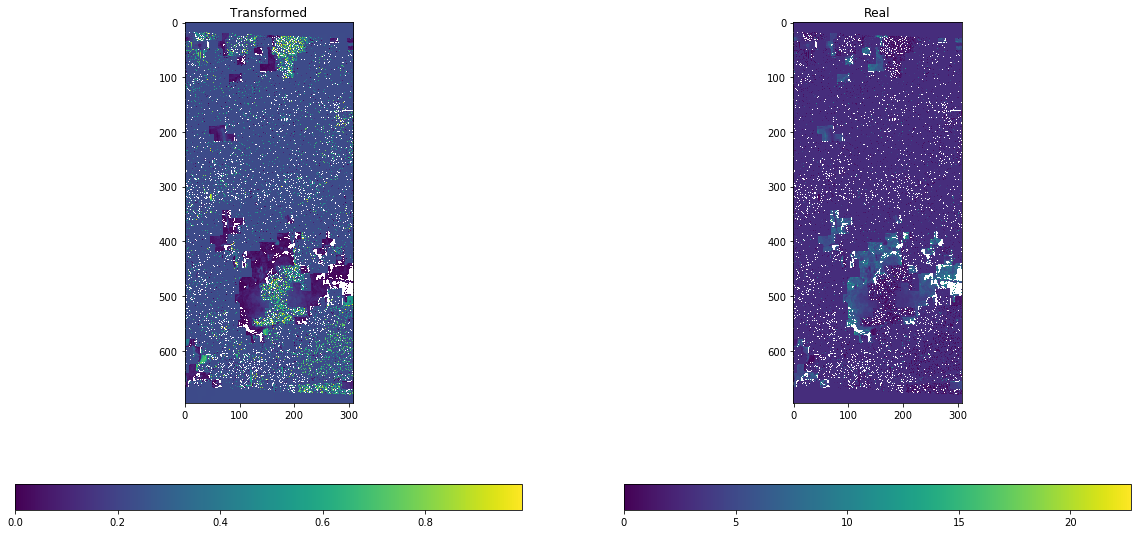

In [38]:
Data_t = InvTransformation(variable_of_interest,Data)

Plot_Transformation(Data,Data_t)

Data_t.shape

## 7.3 Plot Temporal evolution

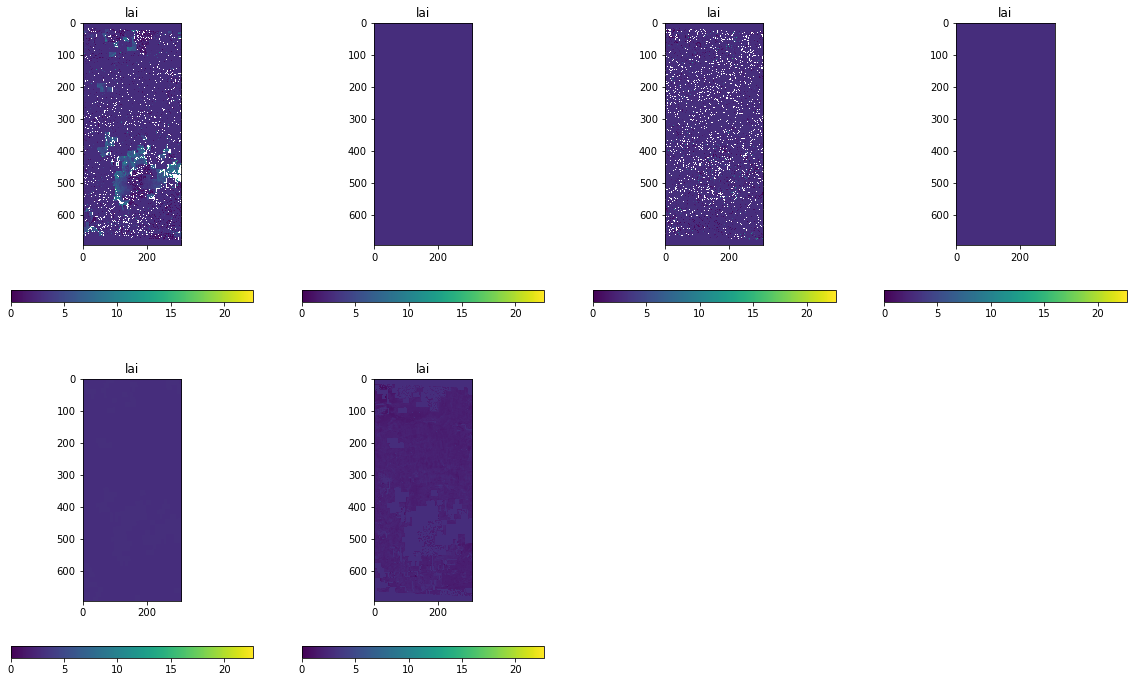

In [47]:
Plot_TRAIT_evolution(Data_t,variable_of_interest)    

# 8 Download the Data
We first need to compile all the biophysical parameters into a single zip file.

In [31]:
import os
download_dir = os.path.join(working_dir, 'download')
create_dir(download_dir)
os.system(f'tar -cvf {download_dir}/biophys_download.zip {biophys_output}')

0

In [32]:
biophys_output

'/data/working_dirs/m1/biophys'

In [33]:
from IPython.display import FileLink, FileLinks
FileLinks(download_dir)


/data/working_dirs/m1/download/
  biophys_download.zip

# the Contributing team
<img src="pics/Logos.png">
